In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [6]:
# Define the Decision Stump classifier
class DecisionStump:
    def __init__(self):
        self.polarity = 1
        self.feature_index = None
        self.threshold = None
        self.alpha = None

In [12]:
# AdaBoost with Decision Stumps
class AdaBoost:
    def __init__(self, n_clf=5):
        self.n_clf = n_clf

    def fit(self, X, y):
        m, n = X.shape

        # Initialize weights
        w = np.full(m, 1 / m)

        self.clfs = []
        for _ in range(self.n_clf):
            clf = DecisionStump()

            # Set initial minimum error to infinity
            min_error = float("inf")
            # train one classifier for each feature and each possible threshold with both polarities
            for feature in range(n):
                feature_values = np.sort(np.unique(X[:, feature]))
                thresholds = (feature_values[:-1] + feature_values[1:]) / 2
                for threshold in thresholds:
                    for polarity in [1, -1]:
                        # predict
                        y_pred = np.ones(m)
                        y_pred[polarity * X[:, feature] < polarity * threshold] = -1
                        # calcculate error
                        error = w[(y_pred != y)].sum()

                        # Save the best stump
                        if error < min_error:
                            clf.polarity = polarity
                            clf.threshold = threshold
                            clf.feature_index = feature
                            min_error = error

            # Calculate alpha (clf weight)
            eps = 1e-10  # used to prevent zero division
            clf.alpha = 0.5 * np.log((1.0 - min_error + eps) / (min_error + eps))

            # Update sample weights
            y_pred = np.ones(m)
            y_pred[
                clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold
            ] = -1
            w *= np.exp(-clf.alpha * y * y_pred)
            w /= np.sum(w)

            # Save the classifier
            self.clfs.append(clf)

    def predict(self, X):
        m, _ = X.shape
        y_pred = np.zeros(m)
        for clf in self.clfs:
            pred = np.ones(m)
            pred[
                clf.polarity * X[:, clf.feature_index] < clf.polarity * clf.threshold
            ] = -1
            y_pred += clf.alpha * pred
        return np.sign(y_pred)

    def plot(self, X, y):
        """Visualize the decision boundary after each round."""
        plot_step = 0.01
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(
            np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
        )

        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        fig, ax = plt.subplots()

        # Plot the data
        
        plt.title(f"AdaBoost Decision Boundary (round {self.n_clf})")
        ax.set_xlabel('X2')
        ax.set_ylabel('X1')
        ax.spines['left'].set_position('center')
        ax.spines['bottom'].set_position('center')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')
        ax.xaxis.set_ticks_position('bottom')
        ax.yaxis.set_ticks_position('left')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.xaxis.set_label_coords(0.95, 0.49)
        ax.yaxis.set_label_coords(0.55, 0.95) 
        ax.yaxis.label.set_rotation(0) 
        norm = mcolors.Normalize(vmin=min(y), vmax=max(y))
        normalized_labels = norm(y)
        
        # Get colors from the colormap
        colormap = plt.cm.RdYlBu
        colors = colormap(normalized_labels)
        cs = plt.contourf(xx, yy, Z, alpha=0.5, cmap='RdYlBu')
        plt.scatter(X[:, 0], X[:, 1], c=colors, marker="o", s=100, zorder=5, clip_on=False)
        # plt.colorbar(cs)
        legend1 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(1.0), markersize=10, label='1')
        legend2 = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colormap(0.0), markersize=10, label='-1')
        plt.legend(handles=[legend1, legend2], loc='upper right')

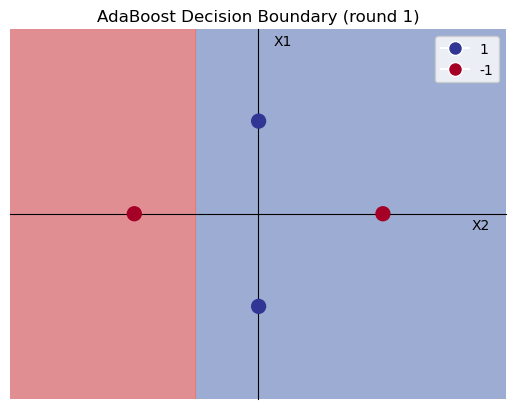

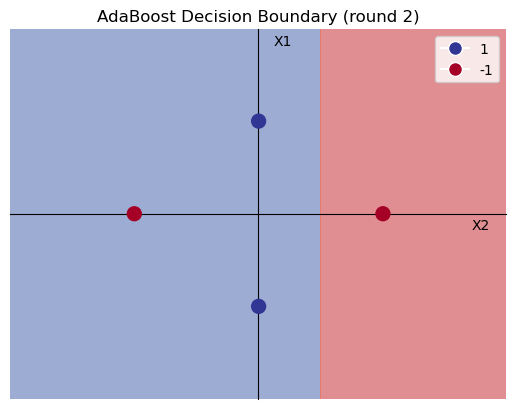

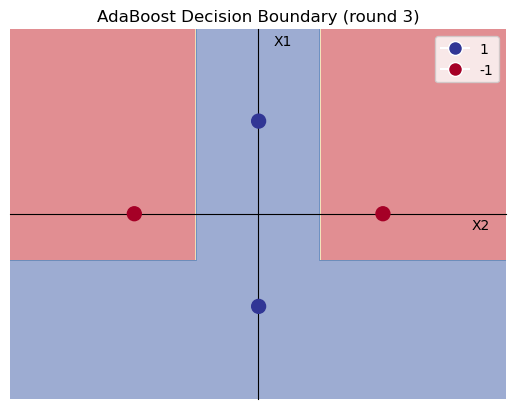

In [13]:

X = np.array([[0, 1], [0, -1], [1, 0], [-1, 0]])
y = np.array([1, 1, -1, -1])

clf = AdaBoost(n_clf=3)
for i in range(1, clf.n_clf + 1):
    clf.n_clf = i
    clf.fit(X, y)
    clf.plot(X, y)
